## Purpose

This notebook explores raw polysomnography (PSG) EEG data and corresponding expert-annotated sleep-stage annotations from the Sleep-EDF dataset.

The goal is to:
- Validate successful data loading
- Inspect raw EEG signal quality
- Verify temporal alignment between EEG signals and hypnogram annotations
- Establish confidence in the dataset before any preprocessing or modeling

No filtering, artifact rejection, or feature extraction is applied at this stage.

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))
import mne
import pandas as pd
from src.io.load_edf import load_edf, load_psg_edf, load_hypnogram_edf
from src.visualization.hypnogram import plot_raw_hypnogram
from src.visualization.signals import plot_raw_signal_with_stages, add_stage_legend

## Dataset Overview

Sleep-EDF is a publicly available sleep dataset containing overnight polysomnography recordings with expert-scored sleep stages.

In this notebook:
- EEG channel: Fpz–Cz
- Sampling frequency: 100 Hz
- Sleep stages are annotated in 30-second epochs
- Sleep-EDF includes legacy stage "4", which corresponds to deep sleep (N3)

Only a single-night recording is analyzed for exploratory purposes.

In [3]:
# Update these paths to your local Sleep-EDF files
psg_path = str(PROJECT_ROOT)+"/data/raw_sleep_edf/SC4002E0-PSG.edf"
hyp_path = str(PROJECT_ROOT)+"/data/raw_sleep_edf/SC4002EC-Hypnogram.edf"
raw = load_edf(psg_path, hyp_path)

/Users/onogantsog/Code/stageclassification/src/io/load_edf.py:6: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/Users/onogantsog/Code/stageclassification/src/io/load_edf.py:6: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/Users/onogantsog/Code/stageclassification/src/io/load_edf.py:6: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
/Users/onogantsog/Code/stageclassification/src/io/load_edf.py:10: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annot)


## EEG Signal Colored by Sleep Stage

A short representative segment is selected to visualize stage-specific EEG morphology.

Coloring the EEG trace by sleep stage allows direct inspection of how signal characteristics differ across sleep states, such as:
- High-amplitude slow waves during deep sleep
- Lower-amplitude mixed-frequency activity during REM

In [ ]:
stage_colors = {
    "Sleep stage W": "#FFD700",
    "Sleep stage 1": "#87CEFA",
    "Sleep stage 2": "#4682B4",
    "Sleep stage 3": "#00008B",
    "Sleep stage 4": "#00008B",
    "Sleep stage R": "#FF69B4",
}

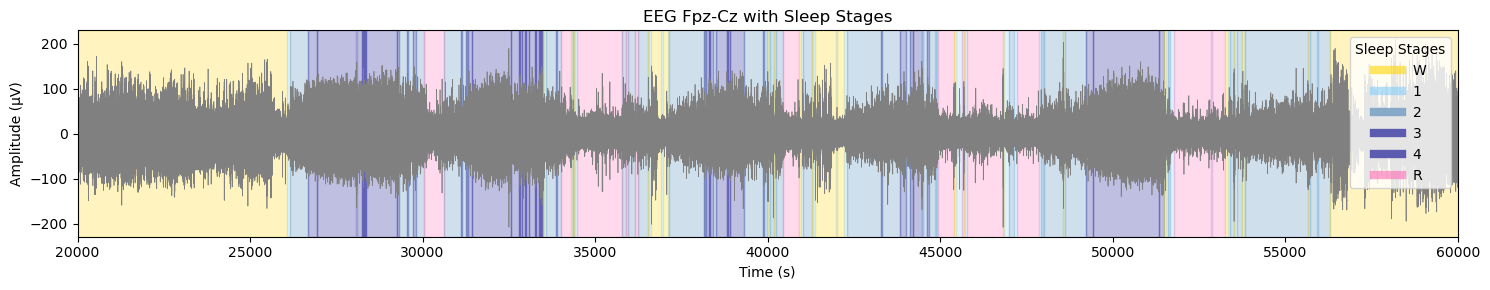

In [4]:
fig, ax = plt.subplots(figsize=(15, 3))

plot_raw_signal_with_stages(
    raw, raw.annotations,
    channel="EEG Fpz-Cz", start=20000, duration=40000,
    stage_colors=stage_colors, ax=ax
)

add_stage_legend(ax, stage_colors)
plt.tight_layout()
plt.show()

## Raw EEG Signal Inspection

The raw EEG signal is visualized to assess:
- Overall signal continuity
- Presence of high-amplitude artifacts
- Baseline stability across the night

At this stage, the signal is intentionally left unfiltered to avoid masking potential acquisition artifacts.

## 3. Construct Hypnogram DataFrame

Sleep stages are visualized as a hypnogram — a stepwise representation of
sleep stage progression over the night.


In [5]:
annotations = raw.annotations
# Convert annotations to DataFrame
stages_df = pd.DataFrame({
    "onset": annotations.onset,
    "duration": annotations.duration,
    "stage": annotations.description
})

# Map stages to numeric codes
stage_map = {
    "W": 0,
    "N1": 1,
    "N2": 2,
    "N3": 3,
    "REM": 4
}

stage_code_map = {
    "Sleep stage W": 0,
    "Sleep stage 1": 1,
    "Sleep stage 2": 2,
    "Sleep stage 3": 3,
    "Sleep stage 4": 3,
    "Sleep stage R": 4,
}

stages_df["stage_code"] = stages_df["stage"].map(stage_code_map)
stages_df["mid_min"] = (stages_df["onset"] + stages_df["duration"] / 2) / 60
stages_df.head()


,onset,duration,stage,stage_code,mid_min
0,0.0,26070.0,Sleep stage W,0.0,217.25
1,26070.0,90.0,Sleep stage 1,1.0,435.25
2,26160.0,510.0,Sleep stage 2,2.0,440.25
3,26670.0,270.0,Sleep stage 3,3.0,446.75
4,26940.0,1140.0,Sleep stage 4,3.0,458.50


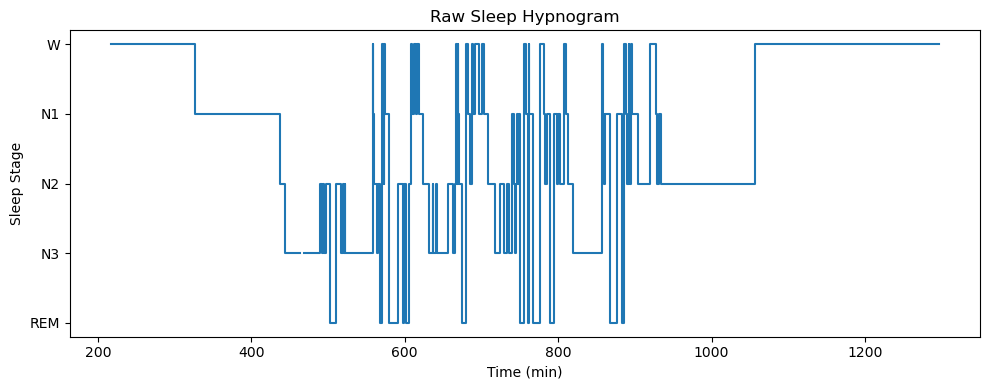

In [6]:
plot_raw_hypnogram(
    stages_df,
    stage_map=stage_map,
    title="Raw Sleep Hypnogram"
)

plt.tight_layout()
plt.show()

The hypnogram shows a typical nocturnal sleep architecture, with early-night dominance of deep sleep (N3) and increased REM density toward the latter half of the night.

This qualitative structure aligns with expected human sleep physiology.

The hypnogram shows a typical nocturnal sleep architecture, with early-night dominance of deep sleep (N3) and increased REM density toward the latter half of the night.

This qualitative structure aligns with expected human sleep physiology.


## Scope and Next Steps

This notebook focuses exclusively on raw data understanding and validation.

The following steps are intentionally deferred to later stages:
- Signal filtering and artifact rejection
- Feature extraction
- Sleep stage modeling or classification

These will be addressed in subsequent sprints after establishing confidence in the raw data.